# NLP Explore Exercises

In [99]:
# general imports
import numpy as np
import pandas as pd

# prepping data
import nltk
import unicodedata
import re 

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


# local imports
import env
import acquire as a
import prepare as p
import explore as e


#### 1. Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

### **Acquire Spam**

In [2]:
spam = a.get_spam_data()
spam

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
5567,5567,spam,This is the 2nd time we have tried 2 contact u...
5568,5568,ham,Will Ì_ b going to esplanade fr home?
5569,5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,5570,ham,The guy did some bitching but I acted like i'd...


### **Prepare Spam**

In [3]:
# for this size of dataset lemmatizing seems better than stemming
# going to clean, tokenize, and lemmatize.
spam = p.prep_spam(spam)
spam

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif oni
2,spam,free entry wkly comp win fa cup final tkts 21s...
3,ham,dun say early hor c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried contact a750 pound prize claim ...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


### **Explore Spam**

In [4]:
# let's see what the raw counts and percentage of messages
# that are ham v. spam
e.show_counts_and_ratios(spam, "label")

,n,percent
ham,4825,0.865937
spam,747,0.134063


#### Splitting the Data

In [5]:
train, validate, test = e.split_data(spam, target='label')

In [6]:
train.head()

,label,text
944,ham,sent scores sophas secondary application schoo...
4860,ham,nokia phone lovly
2153,ham,dont shall buy one dear
3613,ham,ok c
3737,ham,stopped get ice cream go back


In [89]:
ham_words = clean(' '.join(train[train.label=='ham']['text']))
spam_words = clean(' '.join(train[train.label=='spam']['text']))
all_words = clean(' '.join(train['text']))

In [90]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [91]:
ham_freq.head()

im      259
get     182
ok      163
dont    158
go      154
dtype: int64

In [92]:
spam_freq.head()

call      205
free      126
txt        87
text       81
mobile     79
dtype: int64

In [93]:
# concat all frequencies together into a dataframe
word_counts = pd.concat([ham_freq, spam_freq,all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,259,7,266
get,182,43,225
ok,163,3,166
dont,158,11,169
go,154,12,166


### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

<AxesSubplot:>

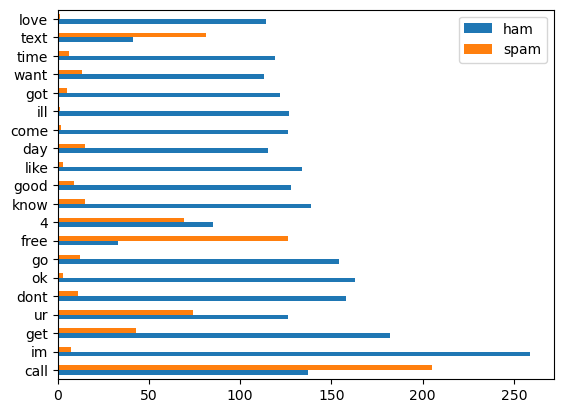

In [94]:
word_counts.sort_values('all', ascending=False
                       )[['ham','spam']].head(20).plot.barh()

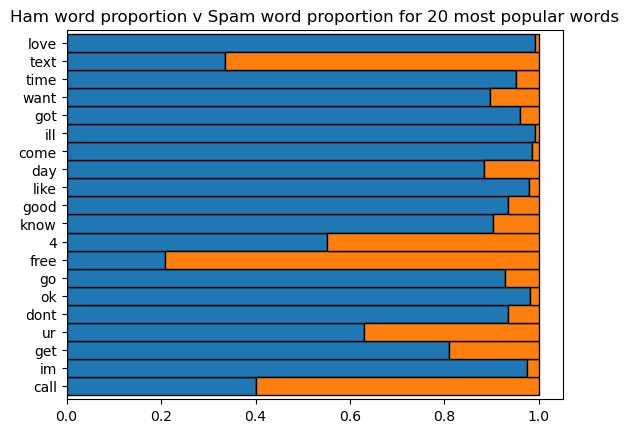

In [95]:
word_counts.sort_values('all', ascending=False
                       ).head(20).apply(
    lambda row: row/row['all'], axis=1
)[['ham','spam']].plot.barh(
    stacked=True, legend=False, ec='black', 
    width=1).set(title='Ham word proportion v Spam word proportion for 20 most popular words');
                                                         

### bigrams


<Axes: >

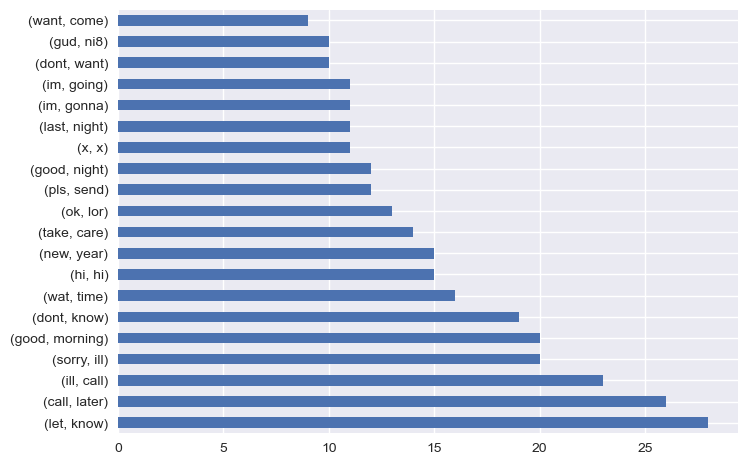

In [67]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(20).plot.barh()

<AxesSubplot:>

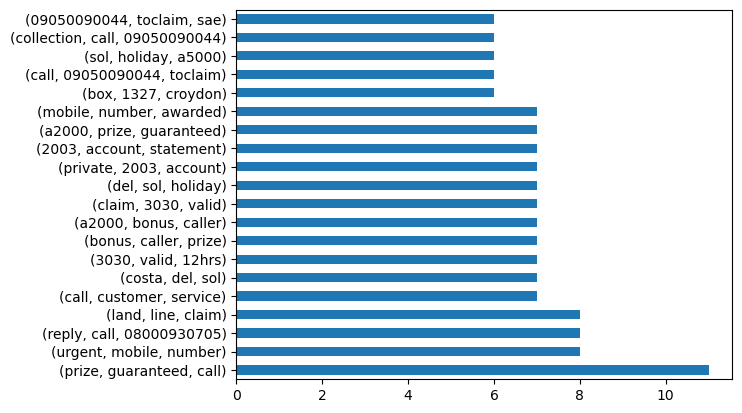

In [97]:
pd.Series(nltk.ngrams(spam_words, 3)
         ).value_counts().head(20).plot.barh()

In [98]:
ham_grams = [thing[0] + '_' + thing[1] for thing in list(nltk.bigrams(ham_words))]

In [100]:
# wordcloud needs a string
img = WordCloud(background_color='White',
         ).generate(' '.join(ham_words))

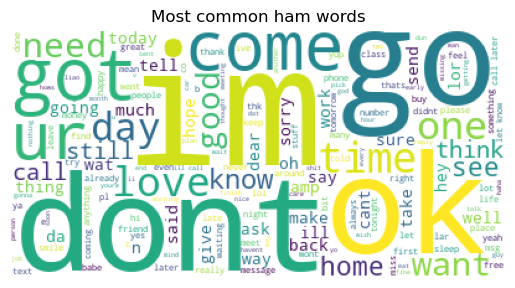

In [102]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common ham words')
plt.show()

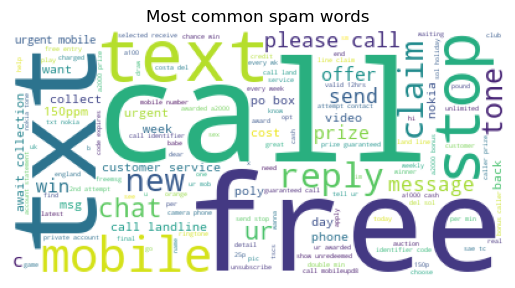

In [103]:
img = WordCloud(background_color='White',
         ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most common spam words')
plt.show()

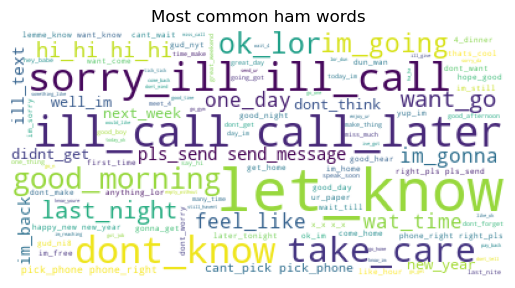

In [104]:
img = WordCloud(background_color='White',
         ).generate(' '.join(ham_grams))
plt.imshow(img)
plt.axis('off')
plt.title('Most common ham words')
plt.show()

#### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [39]:
# cleaning function
ADDITIONAL_STOPWORDS = []
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [60]:
blogs = a.get_blog_articles_data(refresh=False)

In [64]:
blogs.head()

,title,content
0,Women in tech: Panelist Spotlight – Magdalena ...,\nCodeup is hosting a Women in Tech Panel in h...
1,Women in tech: Panelist Spotlight – Rachel Rob...,\nCodeup is hosting a Women in Tech Panel in h...
2,Women in Tech: Panelist Spotlight – Sarah Mellor,\nCodeup is hosting a Women in Tech Panel in ...
3,Women in Tech: Panelist Spotlight – Madeleine ...,\nCodeup is hosting a Women in Tech Panel in h...
4,Black Excellence in Tech: Panelist Spotlight –...,\n\nCodeup is hosting a Black Excellence in Te...


In [71]:
blogs.loc[0, 'content']

'\nCodeup is hosting a Women in Tech Panel in honor of Women’s History Month on March 29th, 2023! To further celebrate, we’d like to spotlight each of our panelists leading up to the discussion to learn a bit about their respective experiences as women in the tech industry!\n\nMeet Magdalena!\nMagdalena Rahn is a current Codeup student in a Data Science cohort in San Antonio, Texas. She has a professional background in cross-cultural communications, international business development, the wine industry and journalism. After serving in the US Navy, she decided to complement her professional skill set by attending the Data Science program at Codeup; she is set to graduate in March 2023. Magdalena is fluent in French, Bulgarian, Chinese-Mandarin, Spanish and Italian.\nWe asked Magdalena how Codeup impacted her career, and she replied “Codeup has provided a solid foundation in analytical processes, programming and data science methods, and it’s been an encouragement to have such supportive

In [72]:
blogs.loc[1, 'content']

'\nCodeup is hosting a Women in Tech Panel in honor of Women’s History Month on March 29th, 2023! To further celebrate, we’d like to spotlight each of our panelists leading up to the discussion to learn a bit about their respective experiences as women in the tech industry! Meet Rachel!\n\nRachel Robbins-Mayhill is a Decision Science Analyst I in San Antonio, Texas. Rachel has had a varied career that includes counseling, teaching, training, community development, and military operations. Her focus has always been on assessing needs, identifying solutions, and educating individuals and groups on aligning needs and solutions in different contexts. Rachel’s passion for data science stems from her belief that data is a powerful tool for communicating patterns that can lead to hope and growth in the future.\nIn June 2022, Rachel graduated from Codeup’s Innis cohort, where she honed her skills in data science. Shortly after, she started working as a Data Science Technical Writer with Apex S

In [67]:
text = clean(' '.join(news['content']))

In [74]:
# make series to see word freqs
word_freqs = pd.Series(text).value_counts()
word_perc = pd.Series(text).value_counts(normalize=True)

In [70]:
word_freqs.head(20)

said        204
sunday       84
video        72
festival     60
also         60
new          48
year         48
pm           48
shared       48
added        48
ipl          48
indian       48
india        48
violence     48
film         48
delhi        48
people       48
group        48
team         48
country      36
dtype: int64

<AxesSubplot:>

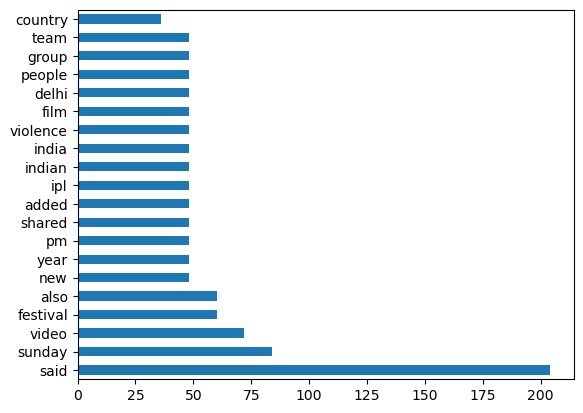

In [76]:
word_freqs.head(20).plot.barh()

(-0.5, 399.5, 199.5, -0.5)

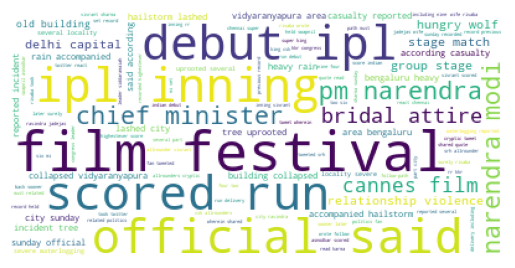

In [78]:
from wordcloud import WordCloud

sentence = ' '.join(text)

img = WordCloud(background_color='white').generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')


#### Bigrams

In [80]:
sentence = ' '.join(text)

bigrams = nltk.ngrams(sentence.split(), 2)
bigram_freqs = pd.Series(bigrams).value_counts()


In [81]:
bigram_freqs.head(20)

(film, festival)            36
(debut, ipl)                24
(2000, note)                24
(hungry, wolf)              24
(bridal, attire)            24
(cannes, film)              24
(delhi, capital)            24
(ipl, inning)               24
(also, shared)              24
(official, said)            24
(group, stage)              24
(stage, match)              24
(relationship, violence)    24
(chief, minister)           24
(narendra, modi)            24
(pm, narendra)              24
(looking, said)             12
(resultwe, looking)         12
(get, resultwe)             12
(said, rohit)               12
dtype: int64

In [86]:
top_20_bigrams = (pd.Series(nltk.ngrams(text, 2))
                      .value_counts()
                      .head(20))

top_20_bigrams.head()


(film, festival)    36
(debut, ipl)        24
(2000, note)        24
(hungry, wolf)      24
(bridal, attire)    24
dtype: int64

<AxesSubplot:>

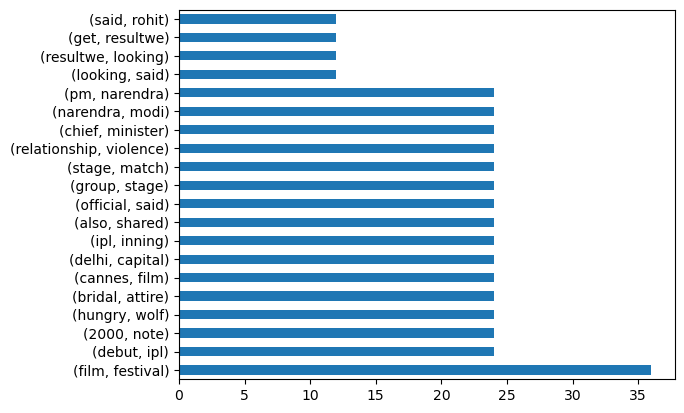

In [85]:
bigram_freqs.head(20).plot.barh()

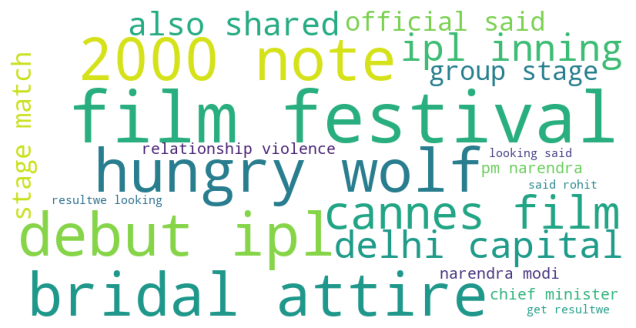

In [87]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


#### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [61]:
news = a.get_news_articles_data(refresh=True)

In [62]:
news.head()

,title,content,category
0,Building collapses in Bengaluru after heavy ra...,An old building collapsed in the Vidyaranyapur...,national
1,Follow your own path: Ravindra Jadeja's wife R...,Ravindra Jadeja's wife Rivaba took to Twitter ...,national
2,23-year-old Vivrant Sharma records highest-eve...,SRH all-rounder Vivrant Sharma on Sunday recor...,national
3,"Siddaramaiah gifted Rado watch by wife, Shivak...",Congress leader Siddaramaiah was reportedly gi...,national
4,"Evidence of 'monster stars' the size of 10,000...",The James Webb Space Telescope (JWST) has disc...,national


In [63]:
news[news.category == 'sports']

,title,content,category
50,Building collapses in Bengaluru after heavy ra...,An old building collapsed in the Vidyaranyapur...,sports
51,Follow your own path: Ravindra Jadeja's wife R...,Ravindra Jadeja's wife Rivaba took to Twitter ...,sports
52,23-year-old Vivrant Sharma records highest-eve...,SRH all-rounder Vivrant Sharma on Sunday recor...,sports
53,"Siddaramaiah gifted Rado watch by wife, Shivak...",Congress leader Siddaramaiah was reportedly gi...,sports
54,"Evidence of 'monster stars' the size of 10,000...",The James Webb Space Telescope (JWST) has disc...,sports
55,Tree branches fall on Vande Bharat Express in ...,The windshield of the pilot cabin of the Howra...,sports
56,"Delhi records 42.9°C maximum temp on Sunday, 3...",The maximum temperature in Delhi on Sunday set...,sports
57,22-yr-old woman techie dies after car submerge...,"A 22-year-old woman, employed at Infosys, died...",sports
58,Thief who targeted guests at luxury hotels arr...,Gujarat's 52-year-old thief Jayesh Ravji Sejpa...,sports
59,Uber driver gets thrashed by group of people a...,An Uber driver was allegedly thrashed by a gro...,sports


In [13]:
news.category.value_counts()

national         25
business         25
sports           25
world            25
politics         25
technology       25
startup          25
entertainment    25
miscellaneous    25
hatke            25
science          25
automobile       25
Name: category, dtype: int64

### Using category, this is a classification problem

 - This gives us a whopping twelve news categories to explore
 

In [19]:
# we could use a df for each category


In [43]:
national_words = clean(' '.join(news[news.category=='national']['content']))
business_words = clean(' '.join(news[news.category=='business']['content']))
sports_words = clean(' '.join(news[news.category=='sports']['content']))
world_words = clean(' '.join(news[news.category=='world']['content']))
politics_words = clean(' '.join(news[news.category=='politics']['content']))
technology_words = clean(' '.join(news[news.category=='technology']['content']))
startup_words = clean(' '.join(news[news.category=='startup']['content']))
entertainment_words = clean(' '.join(news[news.category=='entertainment']['content']))
miscellaneous_words = clean(' '.join(news[news.category=='miscellaneous']['content']))
hatke_words = clean(' '.join(news[news.category=='hatke']['content']))
science_words = clean(' '.join(news[news.category=='science']['content']))
automobile_words = clean(' '.join(news[news.category=='automobile']['content']))
all_words = clean(' '.join(news['content']))

In [44]:
len(sports_words)/len(news[news.category == 'sports'])

36.24

In [50]:
len(national_words) , len(business_words), len(sports_words),\
len(world_words), len(politics_words), len(technology_words),\
len(startup_words), len(entertainment_words), len(miscellaneous_words),\
len(hatke_words), len(science_words), len(automobile_words), len(all_words)

(906, 906, 906, 906, 906, 906, 906, 906, 906, 906, 906, 906, 10872)

In [54]:
national_freq = pd.Series(national_words).value_counts()
business_freq = pd.Series(business_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [55]:
national_freq.head()

said        23
thursday     8
whatsapp     5
ipl          5
post         4
dtype: int64

In [56]:
business_freq.head()

said        23
thursday     8
whatsapp     5
ipl          5
post         4
dtype: int64